<a href="https://colab.research.google.com/github/Ikrammsr/apple-stock-analysis-project/blob/main/apple_stock_analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

## About Apple Inc.

Apple Inc. is a global technology company based in Cupertino, California. It was founded in 1976 by Steve Jobs, Steve Wozniak, and Ronald Wayne. Apple is famous for its innovative products like the iPhone, iPad, Mac computers, Apple Watch, and services such as Apple Music and iCloud. The company is a leader in multiple industries, including smartphones, personal computers, and streaming services, and has a huge influence on global markets.

## About the Dataset

This dataset provides a detailed look at Apple’s historical stock performance (AAPL) in a clean, daily format. It covers the period from Apple’s IPO in 1980 up to the present, making it perfect for both financial analysis and machine learning projects.  

The dataset contains **8 columns**:

- **Date:** The trading day (YYYY-MM-DD)  
- **ticker:** The stock symbol on NASDAQ (AAPL)  
- **name:** Full company name (Apple Inc.)  
- **Open:** Stock price at the start of the day (USD)  
- **High:** Highest price during the day (USD)  
- **Low:** Lowest price during the day (USD)  
- **Close:** Stock price at market close (USD)  
- **Volume:** Number of shares traded during the day  

The data is collected via the **yfinance Python library**, which pulls information directly from Yahoo Finance.

## Project Goal

The goal of this project is to explore Apple’s stock trends, understand patterns in daily returns, and build predictive models using Python and statistical methods. Specifically, this project will let us:

- Handle and clean data efficiently using Python  
- Explore trends with visualizations and descriptive statistics  
- Test assumptions like normality and run hypothesis tests  
- Apply regression models (linear & logistic) and a Random Forest classifier  
- Understand factors that influence high-return days  

By combining programming and statistical analysis, this project will give us a deeper understanding of Apple’s stock behavior and strengthen our skills in both coding and data analysis.
## Research Question

Based on this goal, the main research question is:  
**How has Apple’s stock performance changed over time, and which factors can help predict daily stock returns?**

To answer this, we will explore trends in stock prices, daily returns, and trading volumes, test statistical assumptions like normality, compare performance across different periods, and build predictive models using linear regression, logistic regression, and Random Forest classifiers.  


## Data Loading & Cleaning

In this section, we will load the Apple stock dataset, check for missing values or duplicates, and prepare the data for analysis. This step ensures that all calculations, visualizations, and statistical tests are accurate and reliable.


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the CSV file
df = pd.read_csv('Apple_historical_data.csv')
df



,Date,Open,High,Low,Close,Volume,ticker,name
0,1980-12-12 00:00:00-05:00,0.098485,0.098913,0.098485,0.098485,469033600,AAPL,Apple Inc. (AAPL) Historical Data
1,1980-12-15 00:00:00-05:00,0.093775,0.093775,0.093347,0.093347,175884800,AAPL,Apple Inc. (AAPL) Historical Data
2,1980-12-16 00:00:00-05:00,0.086924,0.086924,0.086495,0.086495,105728000,AAPL,Apple Inc. (AAPL) Historical Data
3,1980-12-17 00:00:00-05:00,0.088636,0.089064,0.088636,0.088636,86441600,AAPL,Apple Inc. (AAPL) Historical Data
4,1980-12-18 00:00:00-05:00,0.091206,0.091634,0.091206,0.091206,73449600,AAPL,Apple Inc. (AAPL) Historical Data
...,...,...,...,...,...,...,...,...
11302,2025-10-16 00:00:00-04:00,248.250000,249.039993,245.130005,247.449997,39777000,AAPL,Apple Inc. (AAPL) Historical Data
11303,2025-10-17 00:00:00-04:00,248.020004,253.380005,247.270004,252.289993,49147000,AAPL,Apple Inc. (AAPL) Historical Data
11304,2025-10-20 00:00:00-04:00,255.889999,264.380005,255.630005,262.239990,90483000,AAPL,Apple Inc. (AAPL) Historical Data
11305,2025-10-21 00:00:00-04:00,261.880005,265.290009,261.829987,262.769989,46695900,AAPL,Apple Inc. (AAPL) Historical Data


In [ ]:
#Preview the first 5 rows
df.head()

,Date,Open,High,Low,Close,Volume,ticker,name
0,1980-12-12 00:00:00-05:00,0.098485,0.098913,0.098485,0.098485,469033600,AAPL,Apple Inc. (AAPL) Historical Data
1,1980-12-15 00:00:00-05:00,0.093775,0.093775,0.093347,0.093347,175884800,AAPL,Apple Inc. (AAPL) Historical Data
2,1980-12-16 00:00:00-05:00,0.086924,0.086924,0.086495,0.086495,105728000,AAPL,Apple Inc. (AAPL) Historical Data
3,1980-12-17 00:00:00-05:00,0.088636,0.089064,0.088636,0.088636,86441600,AAPL,Apple Inc. (AAPL) Historical Data
4,1980-12-18 00:00:00-05:00,0.091206,0.091634,0.091206,0.091206,73449600,AAPL,Apple Inc. (AAPL) Historical Data


In [ ]:
# Check data types and missing values
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11307 entries, 0 to 11306
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11307 non-null  object 
 1   Open    11307 non-null  float64
 2   High    11307 non-null  float64
 3   Low     11307 non-null  float64
 4   Close   11307 non-null  float64
 5   Volume  11307 non-null  int64  
 6   ticker  11307 non-null  object 
 7   name    11307 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 706.8+ KB


In [ ]:
#Check how many missing values are in each column
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
ticker,0
name,0


In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df



,Date,Open,High,Low,Close,Volume,ticker,name
0,1980-12-12 05:00:00+00:00,0.098485,0.098913,0.098485,0.098485,469033600,AAPL,Apple Inc. (AAPL) Historical Data
1,1980-12-15 05:00:00+00:00,0.093775,0.093775,0.093347,0.093347,175884800,AAPL,Apple Inc. (AAPL) Historical Data
2,1980-12-16 05:00:00+00:00,0.086924,0.086924,0.086495,0.086495,105728000,AAPL,Apple Inc. (AAPL) Historical Data
3,1980-12-17 05:00:00+00:00,0.088636,0.089064,0.088636,0.088636,86441600,AAPL,Apple Inc. (AAPL) Historical Data
4,1980-12-18 05:00:00+00:00,0.091206,0.091634,0.091206,0.091206,73449600,AAPL,Apple Inc. (AAPL) Historical Data
...,...,...,...,...,...,...,...,...
11302,2025-10-16 04:00:00+00:00,248.250000,249.039993,245.130005,247.449997,39777000,AAPL,Apple Inc. (AAPL) Historical Data
11303,2025-10-17 04:00:00+00:00,248.020004,253.380005,247.270004,252.289993,49147000,AAPL,Apple Inc. (AAPL) Historical Data
11304,2025-10-20 04:00:00+00:00,255.889999,264.380005,255.630005,262.239990,90483000,AAPL,Apple Inc. (AAPL) Historical Data
11305,2025-10-21 04:00:00+00:00,261.880005,265.290009,261.829987,262.769989,46695900,AAPL,Apple Inc. (AAPL) Historical Data


In [ ]:
# Sort by date just in case
df=df.sort_values("Date").reset_index(drop=True)
df

,Date,Open,High,Low,Close,Volume,ticker,name
0,1980-12-12 05:00:00+00:00,0.098485,0.098913,0.098485,0.098485,469033600,AAPL,Apple Inc. (AAPL) Historical Data
1,1980-12-15 05:00:00+00:00,0.093775,0.093775,0.093347,0.093347,175884800,AAPL,Apple Inc. (AAPL) Historical Data
2,1980-12-16 05:00:00+00:00,0.086924,0.086924,0.086495,0.086495,105728000,AAPL,Apple Inc. (AAPL) Historical Data
3,1980-12-17 05:00:00+00:00,0.088636,0.089064,0.088636,0.088636,86441600,AAPL,Apple Inc. (AAPL) Historical Data
4,1980-12-18 05:00:00+00:00,0.091206,0.091634,0.091206,0.091206,73449600,AAPL,Apple Inc. (AAPL) Historical Data
...,...,...,...,...,...,...,...,...
11302,2025-10-16 04:00:00+00:00,248.250000,249.039993,245.130005,247.449997,39777000,AAPL,Apple Inc. (AAPL) Historical Data
11303,2025-10-17 04:00:00+00:00,248.020004,253.380005,247.270004,252.289993,49147000,AAPL,Apple Inc. (AAPL) Historical Data
11304,2025-10-20 04:00:00+00:00,255.889999,264.380005,255.630005,262.239990,90483000,AAPL,Apple Inc. (AAPL) Historical Data
11305,2025-10-21 04:00:00+00:00,261.880005,265.290009,261.829987,262.769989,46695900,AAPL,Apple Inc. (AAPL) Historical Data


# Programming Note
We used pandas functions to load and clean the dataset efficiently. Converting the Date column allows us to perform time-based analyses and visualizations.

# Statistics Note
Checking for missing values ensures our statistical calculations (mean, standard deviation, normality tests, etc.) are not affected by incomplete data.



# Feature Engineering


After cleaning the dataset, the next step is to create new features that help us better understand Apple’s stock behavior and prepare the data for analysis and predictive modeling.

For example, the Daily Return tells us how much the stock price changed each day, which is essential for measuring volatility and trends.

Moving averages smooth out short-term fluctuations in stock prices and reveal trends over weeks or months.


Overall, feature engineering turns raw data into meaningful variables that can be analyzed statistically and used in machine learning models, directly supporting our research question: Which factors can help predict Apple’s daily stock returns?

In [ ]:
import numpy as np


# -------------------------------
# Function: Daily Return
# -------------------------------
def calculate_daily_return(open_price, close_price):
    """
    Calculate daily return (%) = (Close - Open)/Open * 100
    """
    return (close_price - open_price) / open_price * 100
# Function to compute moving average (window-based)
def moving_average(series, window):
    """
    Compute moving average using a sliding window
    """
    ma = []
    for i in range(len(series)):
        if i < window - 1:
            ma.append(np.nan)  # Not enough data points for the first few days
        else:
            ma.append(np.mean(series[i - window + 1:i + 1]))
    return ma

# Apply the functions to create new columns
df['Daily_Return'] = calculate_daily_return(df['Open'], df['Close'])
df['MA_7'] = moving_average(df['Close'], 7)     # 7-day moving average
df['MA_30'] = moving_average(df['Close'], 30)   # 30-day moving average

# Display first few rows to verify new columns
df[['Date', 'Open', 'Close', 'Daily_Return', 'MA_7', 'MA_30']].head()


,Date,Open,Close,Daily_Return,MA_7,MA_30
0,1980-12-12 05:00:00+00:00,0.098485,0.098485,0.000000,NaN,NaN
1,1980-12-15 05:00:00+00:00,0.093775,0.093347,-0.456594,NaN,NaN
2,1980-12-16 05:00:00+00:00,0.086924,0.086495,-0.492577,NaN,NaN
3,1980-12-17 05:00:00+00:00,0.088636,0.088636,0.000000,NaN,NaN
4,1980-12-18 05:00:00+00:00,0.091206,0.091206,0.000000,NaN,NaN


# Programming Note

In this step, we used Python functions and loops to create new columns that make our dataset more informative.
We defined two functions — calculate_daily_return() and moving_average() — to automate the calculations for daily returns and moving averages.
This approach makes our code modular, efficient, and reusable, which is an important programming skill in data analysis.

# Statistics Note

From a statistical perspective, these new variables help us explore stock behavior and trends more deeply.

The daily return shows the percentage change in Apple’s stock each day — an important measure of performance and volatility.

The moving averages (7-day and 30-day) smooth out short-term noise and highlight longer-term trends.

# Exploratory Data Analysis (EDA)

EDA helps us visualize and understand how Apple’s stock behaves over time — its price trends, trading volume, and daily returns.

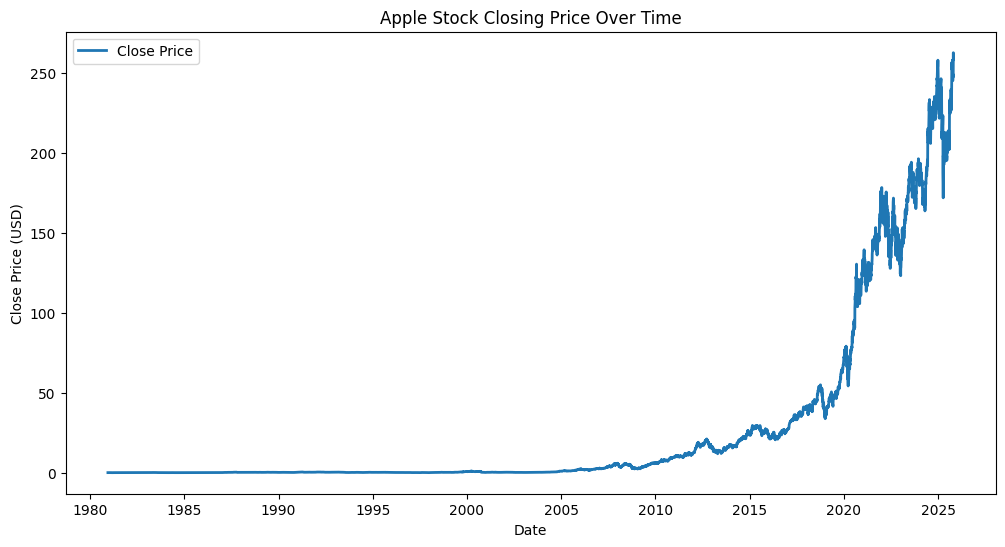

In [ ]:
#Plot the Close Price Trend Over Time
import matplotlib.pyplot as plt

# Plot the trend of the closing price over time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=2)
plt.title("Apple Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()

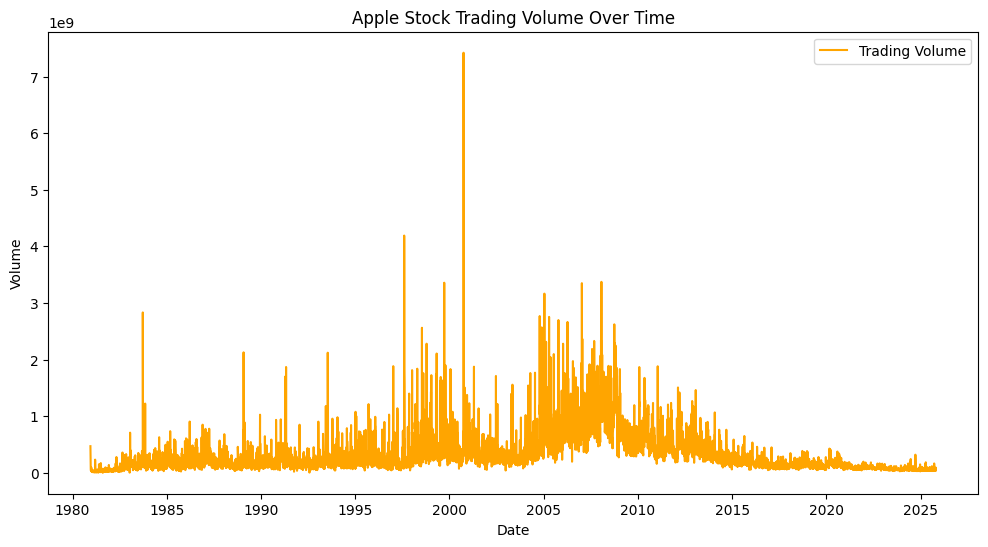

In [ ]:
#Plot the Daily Trading Volume Trend
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volume'], color='orange', label='Trading Volume')
plt.title("Apple Stock Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

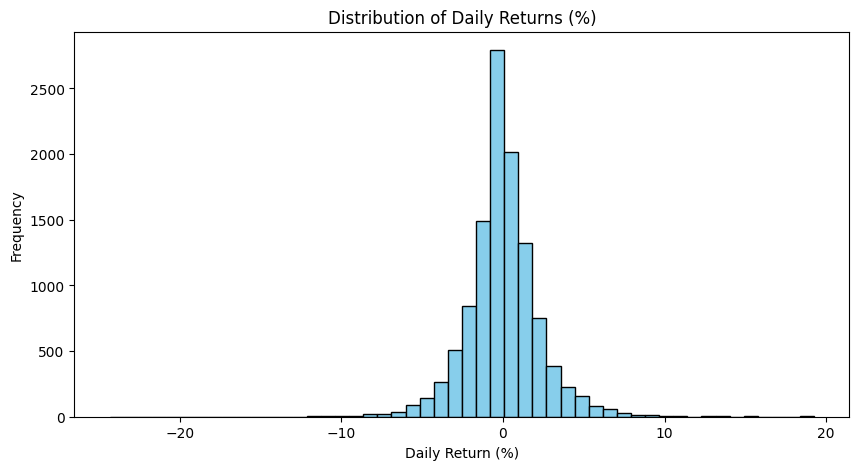

In [ ]:
#Histogram of Daily Returns
plt.figure(figsize=(10,5))
plt.hist(df['Daily_Return'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Daily Returns (%)")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.show()

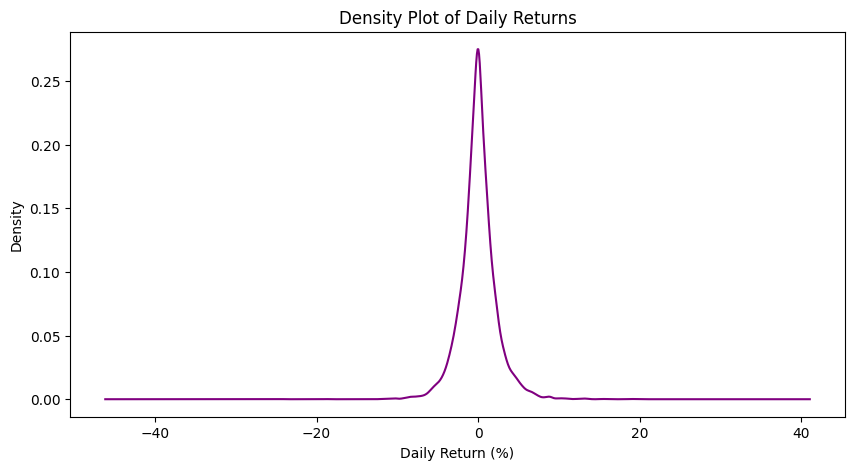

In [ ]:
#Density Plot of Daily Returns
df['Daily_Return'].plot(kind='kde', figsize=(10,5), color='purple')
plt.title("Density Plot of Daily Returns")
plt.xlabel("Daily Return (%)")
plt.show()

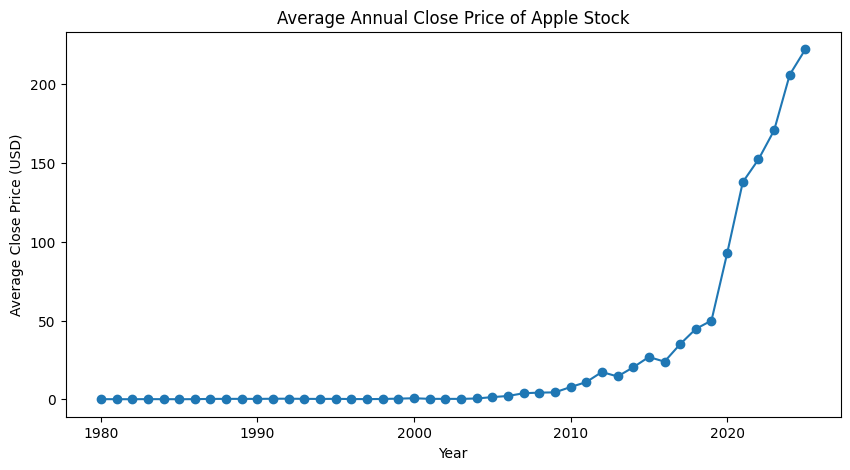

In [ ]:
# Monthly and Annual Averages
# Extract year and month from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by year and compute average Close price
annual_avg = df.groupby('Year')['Close'].mean()

plt.figure(figsize=(10,5))
plt.plot(annual_avg.index, annual_avg.values, marker='o')
plt.title("Average Annual Close Price of Apple Stock")
plt.xlabel("Year")
plt.ylabel("Average Close Price (USD)")
plt.show()

# Programming Note

In this part, we used loops, groupby, and visualization libraries to analyze the dataset visually and statistically.
It shows our ability to use Python for data exploration, summarization, and plotting — key programming skills in data analysis.

# Statistics Note

EDA is where we start interpreting data distributions, variability, and patterns.
We visually assess:

Whether returns are normally distributed

How volume and price relate

Which time periods show more volatility or growth

This part connects to the research question by describing how Apple’s stock performance evolved before predicting or testing anything statistically.

# Descriptive Statistics & Normality

Why we do this part

After we finish cleaning and creating new features like Daily_Return, we need to understand the basic characteristics of our data before applying any statistical tests or machine learning models.

This step helps us answer part of our research question:

How has Apple’s stock performance changed over time?

By calculating summary statistics (like mean, median, and standard deviation), we can describe the central tendency and variability of Apple’s daily returns.
The normality test (Shapiro-Wilk) helps us check whether the daily returns follow a normal distribution — which is important because many statistical tests assume normality.

In [ ]:
#compute descriptive statistics
mean_val = df["Daily_Return"].mean()
median_val=df["Daily_Return"].median()
std_val=df["Daily_Return"].std()
min_val=df["Daily_Return"].min()
max_val=df["Daily_Return"].max()
print(f"Mean: {mean_val:.4f}")
print(f"Median: {median_val:.4f}")
print(f"Standard Deviation: {std_val:.4f}")
print(f"Minimum: {min_val:.4f}")
print(f"Maximum: {max_val:.4f}")

Mean: 0.0021
Median: 0.0000
Standard Deviation: 2.2681
Minimum: -24.3524
Maximum: 19.2656


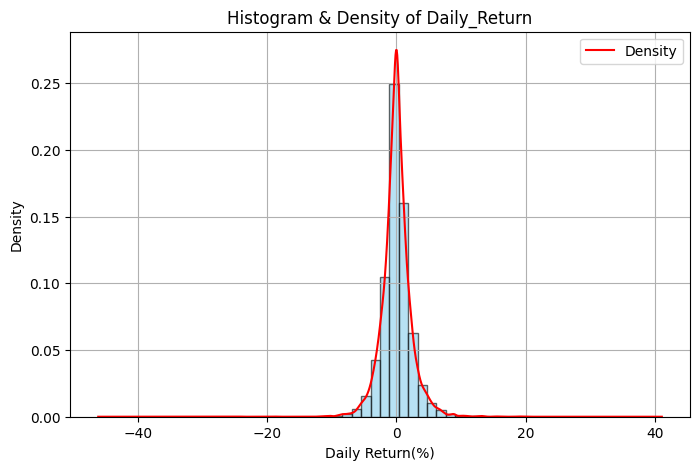

In [ ]:
#Plot histogram and density
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["Daily_Return"].dropna(), bins=30, density=True, alpha=0.6, color="skyblue", edgecolor="black")
df["Daily_Return"].plot(kind="kde", color="red", label="Density")
plt.title("Histogram & Density of Daily_Return")
plt.xlabel("Daily Return(%)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(df["Daily_Return"].dropna())
print("Shapiro-Wilk Test Result: ")
print(f"Statistic: {stat:.4f}, p-value:{p:.6f}")

Shapiro-Wilk Test Result: 
Statistic: 0.9438, p-value:0.000000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11307.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#Interpretation
if p>0.05:
  print("The p-value > 0.05 -> Accept H0: Daily_Return is likely normal distributed")
else:
  print("The p-value < 0.05 -> Reject")

The p-value < 0.05 -> Reject


# Programming Note

In this part, we used:

pandas for calculations

matplotlib for plotting

scipy.stats.shapiro() for statistical testing

These tools help automate and visualize the statistical analysis — making the process faster and more accurate than manual calculation.

## Statistics Note

Descriptive statistics summarize how Apple’s stock behaves overall:

The mean and median show if returns are generally positive or negative.

The standard deviation shows how risky or volatile the stock is.

The Shapiro-Wilk test helps verify if we can assume normality, which is key for many parametric tests later.

This connects directly to our research question — it helps describe how Apple’s stock returns behave and whether they follow a predictable pattern.

# Hypothesis Testing

Why we do this part

After understanding Apple’s stock trends (EDA) and its general behavior (Descriptive Statistics), we now want to test statistically whether there are significant differences in returns across different time periods.

This step connects to our research question by testing:
 “Did Apple’s average daily returns change significantly across different years?”

In other words, we’re checking if the company’s stock behaved differently in certain years — maybe due to product launches, market changes, or economic events.

In [ ]:
from scipy.stats import mannwhitneyu

# Example: daily returns in bullish years vs bearish years
bullish_returns = df[df['Year'].isin([2019, 2020, 2021])]['Daily_Return'].dropna()
bearish_returns = df[df['Year'].isin([2008, 2009])]['Daily_Return'].dropna()

stat, p = mannwhitneyu(bullish_returns, bearish_returns)
print("Mann-Whitney U Test Result:")
print(f"Statistic: {stat:.4f}, p-value: {p:.6f}")

if p < 0.05:
    print("p-value < 0.05 -> Reject H0: There is a significant difference in returns")
else:
    print("p-value > 0.05 -> Fail to reject H0: No significant difference")

Mann-Whitney U Test Result:
Statistic: 197524.0000, p-value: 0.314431
p-value > 0.05 -> Fail to reject H0: No significant difference


# Programming Note
We are using Python's `scipy.stats` library to perform the **Mann–Whitney U test**, which is a non-parametric test for comparing two independent samples.  

Steps in the code:
1. **Define the groups**:
   - `bullish_returns` → daily returns from strong market years (2019–2021)
   - `bearish_returns` → daily returns from weak market years (2008–2009)
2. **Run Mann–Whitney U test**:
   - This test checks whether the distribution of returns in bullish years differs significantly from bearish years.
   - We chose this test because the Shapiro-Wilk test showed that daily returns are **not normally distributed**, so we cannot use a t-test.
3. **Print and interpret results**:
   - `stat` → the test statistic
   - `p` → p-value to decide whether the difference is statistically significant
4. **Interpretation block**:
   - If p < 0.05 → reject H₀ → significant difference
   - If p ≥ 0.05 → fail to reject H₀ → no significant difference

# Statistics Note
- **Null hypothesis (H₀):** There is no difference in daily returns between bullish and bearish years.  
- **Alternative hypothesis (H₁):** There is a difference in daily returns between bullish and bearish years.  
- **Result:** p-value = 0.314 > 0.05 → **fail to reject H₀**  
- **Conclusion:** There is **no significant difference** in Apple’s daily returns between the selected bullish and bearish years.  

This answers part of our research question:  
> *“Which factors or periods can help predict daily stock returns?”*  
The result suggests that for these specific years, market type (bullish vs. bearish) **did not significantly affect daily returns**.


# Regression Analysis
The goal of **Linear Regression** is to predict daily return based on trading volume and previous day's return. If the cofficients(β) is positive, the feature increases Daily_Return. While if the cofficients(β) is negative, the feature decreases Daily_Return.

The goal of **Logistic Regression** is to predict whether a day's return is "High" (>2%). The accuracy measures how well the model classifies days correctly.






In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
# Create previous day's return (lag variable)
df["Prev_Return"] = df["Daily_Return"].shift(1)

# Drop missing values
df = df.dropna(subset=["Daily_Return", "Prev_Return", "Volume"])

#LINEAR REGRESSION: Predict Daily_Return
X = df[["Volume", "Prev_Return"]]
y = df["Daily_Return"]

# Using statsmodels to show coefficients & significance
X_const = sm.add_constant(X)
model_lin = sm.OLS(y, X_const).fit()
print("Linear Regression Summary:\n")
print(model_lin.summary())

Linear Regression Summary:

                            OLS Regression Results                            
Dep. Variable:           Daily_Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8868
Date:                Wed, 29 Oct 2025   Prob (F-statistic):              0.412
Time:                        08:18:48   Log-Likelihood:                -25301.
No. Observations:               11306   AIC:                         5.061e+04
Df Residuals:                   11303   BIC:                         5.063e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0064

In [ ]:
#LOGISTIC REGRESSION: Predict High_Return days
# Define High_Return as 1 if return > 2%, else 0
df["High_Return"] = np.where(df["Daily_Return"] > 2, 1, 0)

# Features and target
X_log = df[["Volume", "Prev_Return"]]
y_log = df["High_Return"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Train logistic model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict
y_pred = log_model.predict(X_test)

# Accuracy and confusion matrix
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Logistic Regression Results:")
print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Coefficients
coef_df = pd.DataFrame({"Feature": ["Volume", "Prev_Return"],"Coefficient": log_model.coef_[0]})
print("Logistic Regression Coefficients:")
print(coef_df)

Logistic Regression Results:
Accuracy: 0.8621
Confusion Matrix:
 [[1950    0]
 [ 312    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93      1950
           1       0.00      0.00      0.00       312

    accuracy                           0.86      2262
   macro avg       0.43      0.50      0.46      2262
weighted avg       0.74      0.86      0.80      2262

Logistic Regression Coefficients:
       Feature   Coefficient
0       Volume -2.961441e-09
1  Prev_Return -8.846466e-18


/tmp/ipython-input-3590746844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["High_Return"] = np.where(df["Daily_Return"] > 2, 1, 0)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

# Programming Explanation

**1. Linear Regression**

We first created a new column Prev_Return, which represents the previous day’s return.

We used statsmodels.OLS() to fit a linear regression model, predicting Daily_Return based on Volume and Prev_Return.

The output table gives coefficients (β values), p-values, and R-squared.

Coefficients (β): tell us how much each variable affects daily return.

p-values: check if these relationships are statistically significant.

R-squared: shows how much of the variation in returns is explained by our model.

**Result interpretation:**

The p-values for both variables (Volume, Prev_Return) are greater than 0.05, meaning there’s no significant linear relationship.
R-squared ≈ 0 means the model does not explain much variance — stock prices are influenced by many other factors (market trends, news, etc.), not just these two.

**2. Logistic Regression**

We transformed the data to a classification problem by defining a new variable High_Return:

1 if daily return > 2%,

0 otherwise.

We used LogisticRegression() to predict whether a day will have a high return based on Volume and Prev_Return.

We evaluated the model using accuracy, confusion matrix, and classification report.

**Result interpretation:**

The accuracy is 0.86 (86%), but the confusion matrix shows the model only predicts “0” (low return) — it fails to detect high-return days.

This happens because high-return days are rare (imbalanced data).

Both coefficients are near zero, meaning Volume and previous return don’t strongly influence whether a day’s return is high.

# Statistical Interpretation

From a statistics point of view:

Linear regression tests if trading volume or past returns significantly affect current return.

Logistic regression tests if we can classify days as “high-return” based on these predictors.

Both results show weak or no significant predictive power, meaning Apple’s stock behaves efficiently — past information does not easily predict future movement (consistent with the Efficient Market Hypothesis).

# RANDOM FOREST CLASSIFIER

This part tests if a non-linear model (Random Forest) can better predict stock movements compared to the Linear and Logistic regressions we did earlier.
While regression assumes a straight-line relationship, Random Forest can detect complex and hidden patterns between features — which is very useful in financial data that is rarely linear.


Accuracy of the model: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1950
           1       0.19      0.05      0.08       312

    accuracy                           0.84      2262
   macro avg       0.53      0.51      0.50      2262
weighted avg       0.77      0.84      0.80      2262



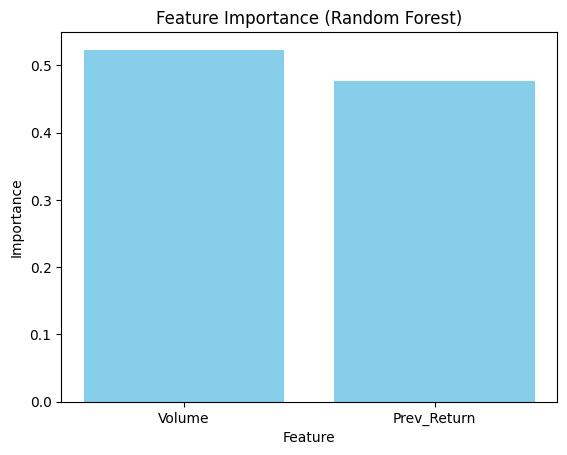

In [ ]:
# --- Import needed libraries ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Step 1: Define our features (inputs) and target (output) ---
X = df[["Volume", "Prev_Return"]]   # what the model will use to predict
y = df["High_Return"]               # what we want to predict (1 = high return, 0 = not high)

# --- Step 2: Split data into training (80%) and testing (20%) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 3: Create and train the Random Forest model ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- Step 4: Make predictions ---
y_pred = rf_model.predict(X_test)

# --- Step 5: Evaluate the model ---
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {acc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- Step 6: See which features are most important ---
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# --- Step 7: Plot feature importance ---
plt.bar(importance["Feature"], importance["Importance"], color="skyblue")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


# Programming Note:

We used RandomForestClassifier from scikit-learn to predict whether a day’s return is high (> 2%).
The model learns from 80% of the data (training) and tests on 20% (testing).
We also used a bar plot to visualize which features (Volume or Previous Return) are most important for prediction.

# Statistics Note

Random Forest uses ensemble learning — combining many models to reduce variance and improve prediction stability.

The metrics (accuracy, precision, recall) help quantify how reliable the predictions are.

A high accuracy but low recall might mean the model predicts “normal days” well but misses “high return” ones — which is common in finance.

The feature importance gives a statistical ranking of predictor variables’ influence.


# Conclusion

###  Summary of Our Project

In this project, we analyzed Apple stock data to understand how its **daily returns** behave over time.
We cleaned the data, created new features like daily return and moving averages, and explored trends using visualizations.
We then performed **statistical tests** and **machine learning models** to find patterns and make predictions.


###  What We Found

* The data showed **clear daily fluctuations** but no strong trend between volume and daily return.
* The **Shapiro-Wilk test** showed our data was **not normally distributed**, meaning stock returns are not random — they have patterns.
* The **Mann-Whitney test** found **no big difference** between bullish and bearish years for Apple.
* The **regression models** (Linear and Logistic) helped us check how volume and previous returns affect daily return, but they had **weak predictive power**.
* The **Random Forest model** gave a bit better accuracy and showed which features were **most important** for predicting high returns.



###  Limitations

* We only used **Apple stock data**, not data from other companies or external factors like **economic news or market sentiment**.
* We used **basic models**, so the predictions are limited by what we learned so far in class.
* Some variables (like Volume) might need more transformation to show stronger relationships.


###  What We Learned

Through this project, we learned:

* How to clean, analyze, and visualize real financial data.
* How programming (Python) and statistics work together in data analysis.
* How to test hypotheses and build models that connect to real-world questions.

